<a href="https://colab.research.google.com/github/amandaprawita/Percobaan/blob/main/Pelatihan_LSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIM : A11.2021.13646 <br>
Nama : Amanda Prawita Ningrum

## **Project Pelatihan LSP Data Science**

## **Pengumpulan Data**

Dataset : https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction



## **Menelaah Data**

In [ ]:
import numpy as np # untuk komputasi numerik (matematika, array, statistik).
import pandas as pd # untuk manipulasi dan analisis data dalam format tabel.

# Menampilkan semua kolom dari dataframe saat mencetak dataframe
pd.set_option("display.max_columns", None)

## **Memuat Data**

Memasukan dataset dengan alamat penyimpanan di gdrive dan simpan kedalam sebuah variabel

In [ ]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengecek file dalam directory
!ls "/content/drive/MyDrive/aids virus infection prediction/AIDS_Classification.csv" # menampilkan daftar file/direktori untuk memastikan file tersedia

'/content/drive/MyDrive/aids virus infection prediction/AIDS_Classification.csv'


In [ ]:
# dir adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
dir =  '/content/drive/MyDrive/aids virus infection prediction/AIDS_Classification.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

Baca dataset csv dengan library pandas

In [ ]:
# Membaca dan menampilkan dataset
data = pd.read_csv(dir) # membaca file CSV dari path yang telah didefinisikan sebelumnya.
data.head() # Menampilkan data 5 baris pertama dataset untuk melihat struktur data.

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


In [ ]:
data.tail() # Menampilkan data 5 baris terakhir dataset.

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,0,0,1,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,0,0,1,0,1,0,1,0,911,930,885,526,0


Menampilkan informasi file dataset dalam dataframe

In [ ]:
# Informasi dataset
data.info() # memberikan ringkasan struktur dataset, termasuk tipe data dan jumlah nilai kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [ ]:
data.describe().T # memberikan statistik deskriptif dataset (mean, std, min, dll.) dan ditranspos (T) agar lebih mudah dibaca

,count,mean,std,min,25%,50%,75%,max
time,2139.0,879.098177,292.274324,14.0,727.0000,997.0000,1091.0000,1231.00000
trt,2139.0,1.520804,1.127890,0.0,1.0000,2.0000,3.0000,3.00000
age,2139.0,35.248247,8.709026,12.0,29.0000,34.0000,40.0000,70.00000
wtkg,2139.0,75.125311,13.263164,31.0,66.6792,74.3904,82.5552,159.93936
hemo,2139.0,0.084151,0.277680,0.0,0.0000,0.0000,0.0000,1.00000
homo,2139.0,0.661057,0.473461,0.0,0.0000,1.0000,1.0000,1.00000
drugs,2139.0,0.131370,0.337883,0.0,0.0000,0.0000,0.0000,1.00000
karnof,2139.0,95.446470,5.900985,70.0,90.0000,100.0000,100.0000,100.00000
oprior,2139.0,0.021973,0.146629,0.0,0.0000,0.0000,0.0000,1.00000
z30,2139.0,0.550257,0.497584,0.0,0.0000,1.0000,1.0000,1.00000


## **Menvalidasi Data**

In [ ]:
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

In [ ]:
# Membuat histogram bagi setiap kolom numerik dalam sebuah dataframe
def plot_histograms(dataframe, numeric_columns): # membuat histogram untuk setiap kolom numerik dalam dataset.

    num_cols = len(numeric_columns) # daftar kolom numerik yang akan divisualisasikan.
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)  # Untuk mengurangi ukurannya, kami mengurangi nilai tempat sampah.
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])  # Jika jumlah kolom tidak habis dibagi 4, hapus sumbu yang berlebihan

    # menampilkan histogram frekuensi untuk setiap kolom numerik.
    plt.tight_layout()
    plt.show()

In [ ]:
# Menganalisis hubungan antara kolom kategorikal dengan target (variabel dependen) dalam sebuah dataframe, dan menyajikan hasilnya dalam bentuk tabel dan visualisasi bar chart
def target_summary_with_cat_visualized(dataframe, target, categorical_col):
    # Rata-rata nilai target dihitung untuk setiap kategori
    grouped_data = dataframe.groupby(categorical_col)[target].mean()

    # Membuat Dataframe dari Hasil Pengelompokan
    summary_df = pd.DataFrame({"TARGET_MEAN": grouped_data})

    # Visualisasi dengan Bar Chart
    plt.figure(figsize=(5, 5))
    summary_df.plot(kind='bar')
    plt.title('Mean Target by ' + categorical_col)
    plt.xlabel(categorical_col)
    plt.ylabel('Mean Target')
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("-"*50)

In [ ]:
# Menganalisis hubungan antara kolom target (kategorikal) dengan kolom numerik dalam sebuah dataframe
def target_summary_with_num_visualized(dataframe, target, numerical_col):
    # Hitung rata-rata dari kolom numerik untuk setiap kategori variabel target
    grouped_data = dataframe.groupby(target)[numerical_col].mean()

    # Membuat diagram batang untuk memvisualisasikan data
    plt.figure(figsize=(5, 5))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title('Mean ' + numerical_col + ' by ' + target)
    plt.xlabel(target)
    plt.ylabel('Mean ' + numerical_col)
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("-"*50)

In [ ]:
# Membuat visualisasi boxplot (diagram kotak) untuk semua kolom numerik yang diberikan
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 #Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

In [ ]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Jumlah observasi: 2139
Jumlah variabel: 23
Kolom kategorikal: 15
Kolom Numerik: 8
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 15


## Menentukan Object Data

In [ ]:
# Menampilkan 5 baris pertama dari dataframe data
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


In [ ]:
# Menampilkan 5 baris terakhir dari dataframe data
data.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,0,0,1,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,0,0,1,0,1,0,1,0,911,930,885,526,0


In [ ]:
# Menampilkan informasi ringkas tentang dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [ ]:
# Menghitung frekuensi kemunculan nilai unik dalam sebuah kolom atau objek Pandas
data.value_counts()

time  trt  age  wtkg      hemo  homo  drugs  karnof  oprior  z30  preanti  race  gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected
1231  2    39   67.13280  0     0     1      100     0       1    1057     0     0       1     3      0        1      0       470   590    950   930    0           1
14    3    30   64.63800  0     1     0      90      0       0    0        0     1       0     1      1        1      0       131   253    227   496    1           1
33    0    36   74.39040  0     1     0      80      0       1    381      0     1       1     3      1        0      1       173   160    724   649    1           1
45    2    38   78.01920  0     1     0      90      0       1    1099     0     1       1     3      0        1      0       416   221    1663  1055   1           1
50    2    43   64.41120  0     1     0      70      0       1    29       0     1       1     2      1        1      1       164   52     944   927    1           1
                                                                                                                                                                   ..
147   0    38   83.46240  0     0     0      90      0       1    763      0     1       1     3      0        0      1       248   95     765   846    0           1
      3    30   79.50000  0     1     0      100     0       0    0        1     1       0     1      1        1      1       348   165    1060  632    1           1
148   2    19   77.88312  1     0     0      90      0       1    788      0     1       1     3      0        1      1       315   237    1241  533    0           1
      3    35   83.00880  0     1     0      100     0       1    134      0     1       1     2      1        1      1       395   243    1579  1138   0           1
150   2    18   77.00000  1     0     0      100     0       1    488      0     1       1     3      0        1      1       294   467    910   918    1           1
Name: count, Length: 2139, dtype: int64

In [ ]:
# Cek missing value
data.isnull().sum()

# Imputasi missing value dengan median (untuk kolom numerik)
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# Imputasi missing value dengan modus (untuk kolom kategorikal)
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Cek kembali missing value setelah imputasi
data.isnull().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


## **Membersihkan Data**

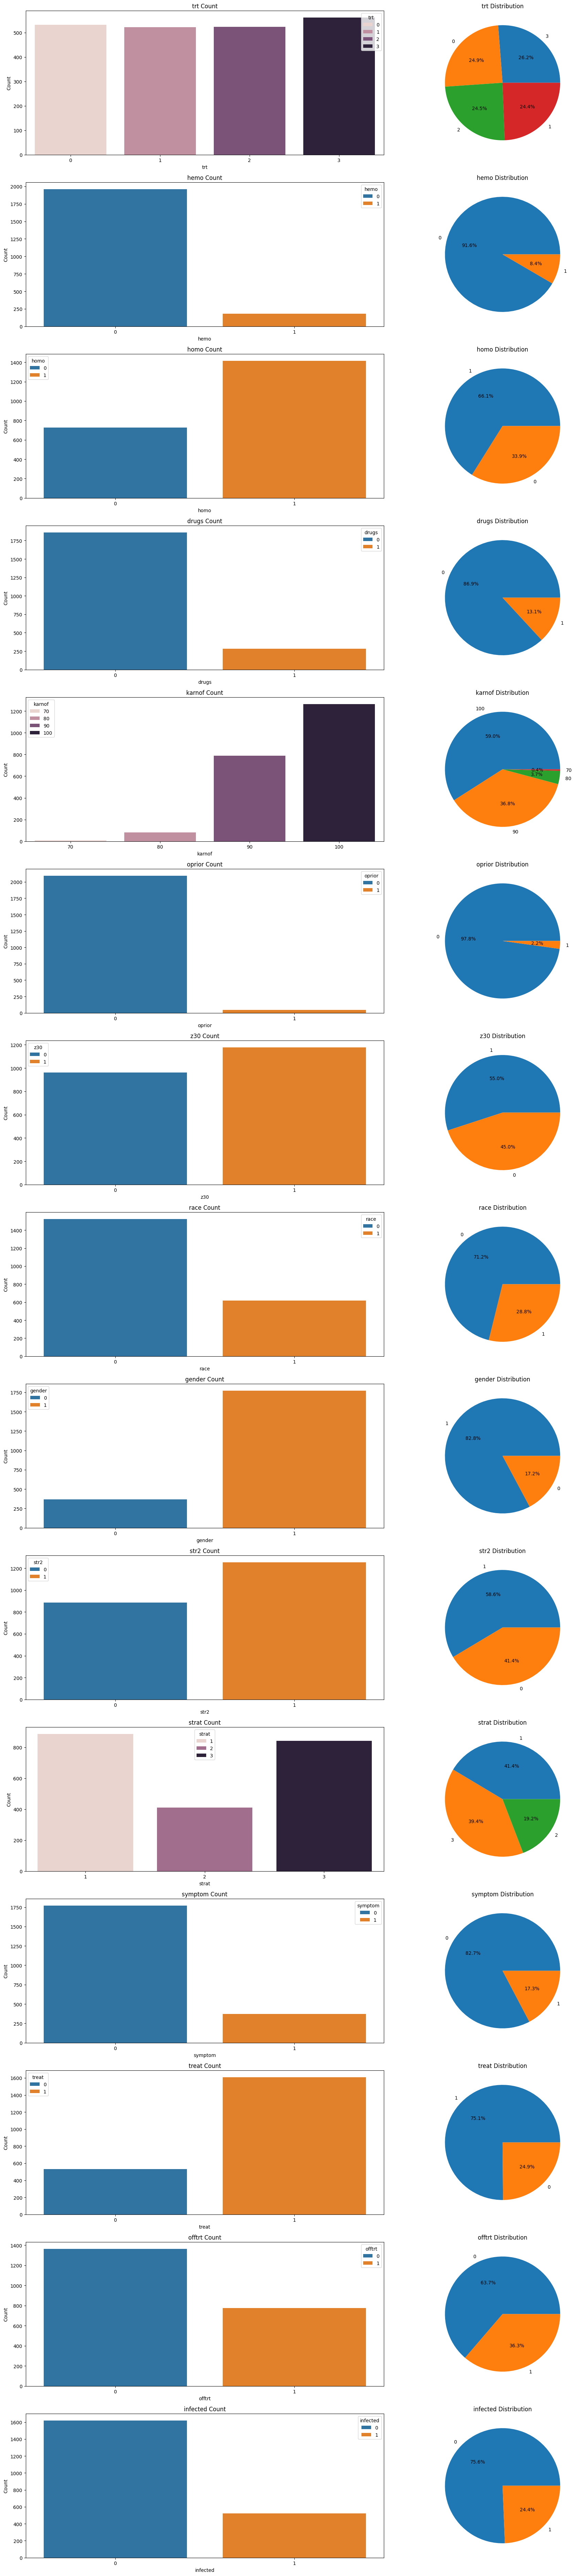

In [ ]:
plot_categorical(data, cat_cols)  # Ganti 'dataset_clean' dengan 'data' jika Anda ingin menggunakan dataframe original

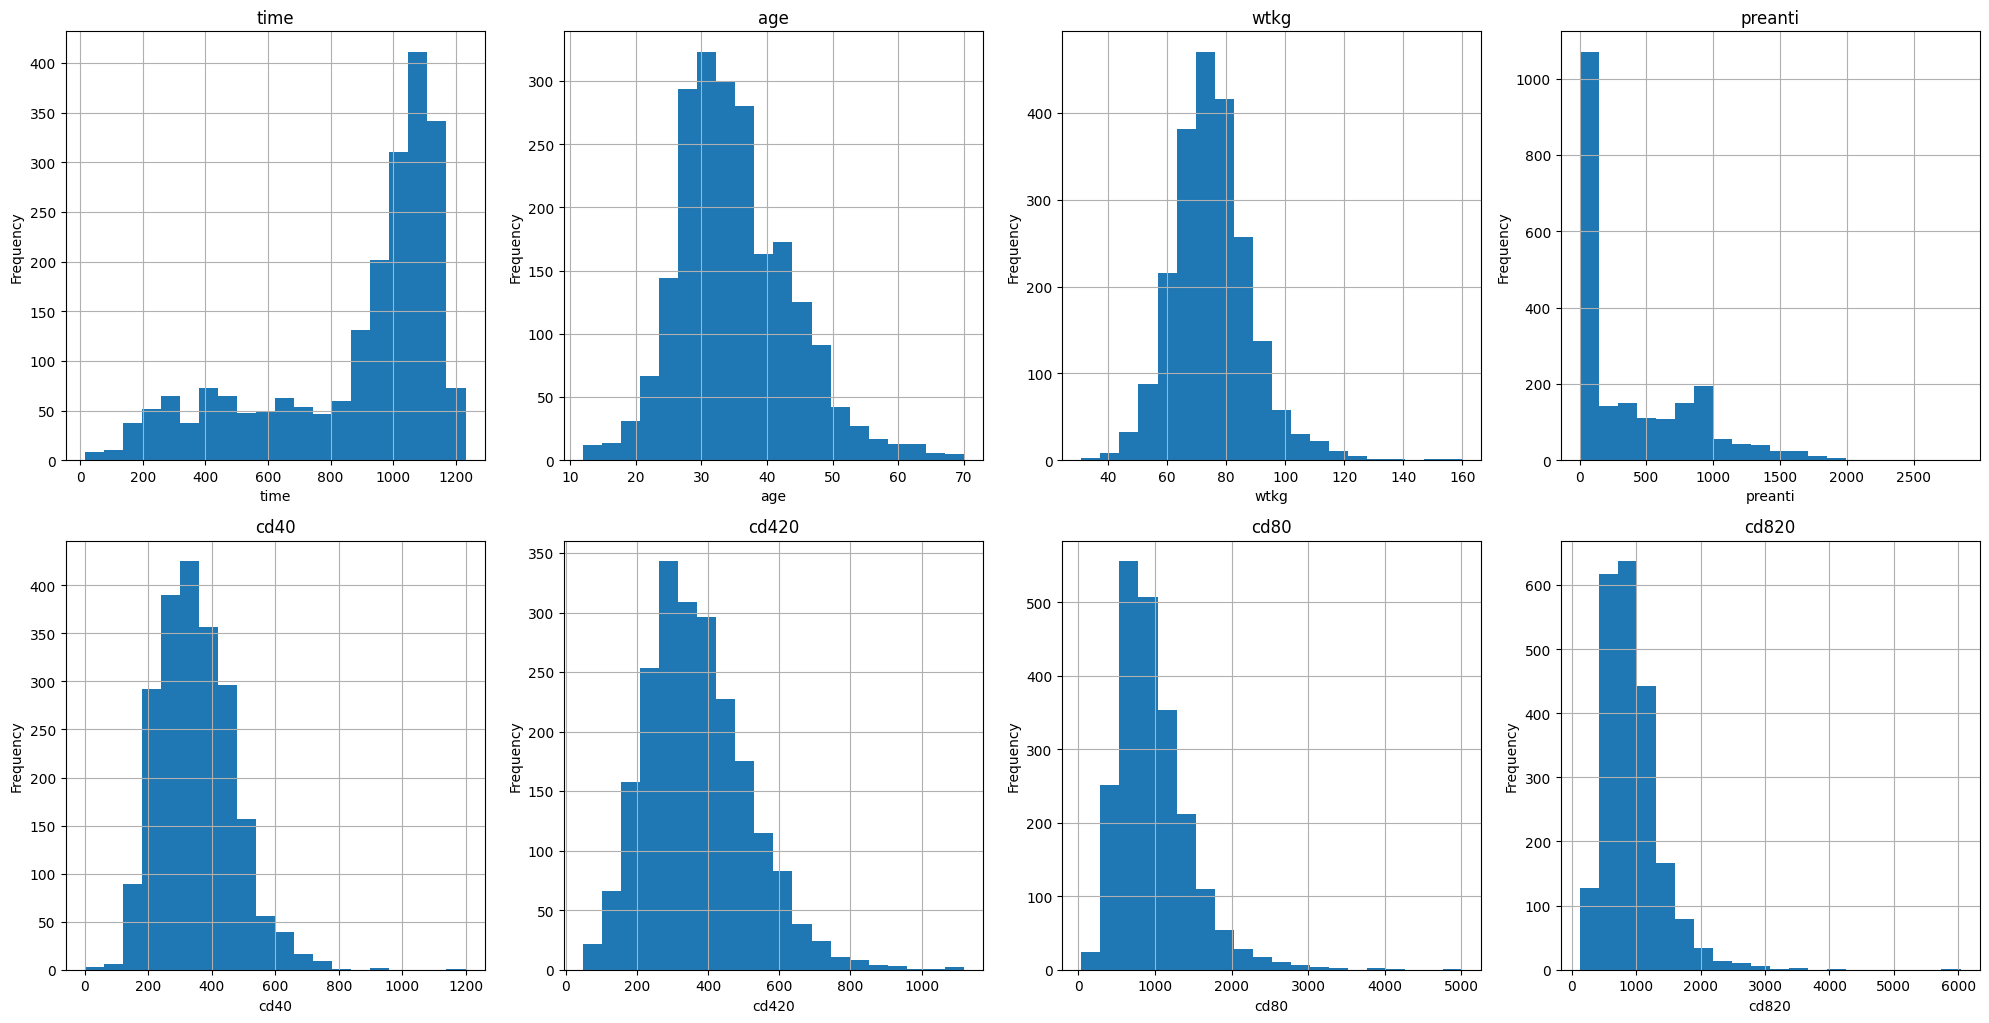

In [ ]:
plot_histograms(data, num_cols)  # Ganti 'dataset_clean' dengan 'data' jika Anda ingin menggunakan dataframe original

<Figure size 500x500 with 0 Axes>

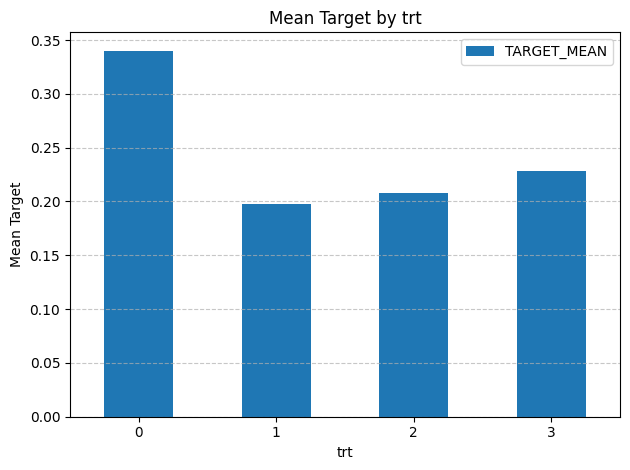

     TARGET_MEAN
trt             
0       0.340226
1       0.197318
2       0.208015
3       0.228164
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

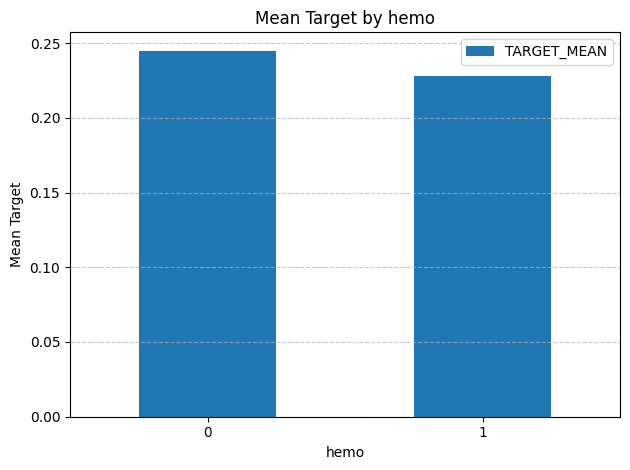

      TARGET_MEAN
hemo             
0        0.245023
1        0.227778
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

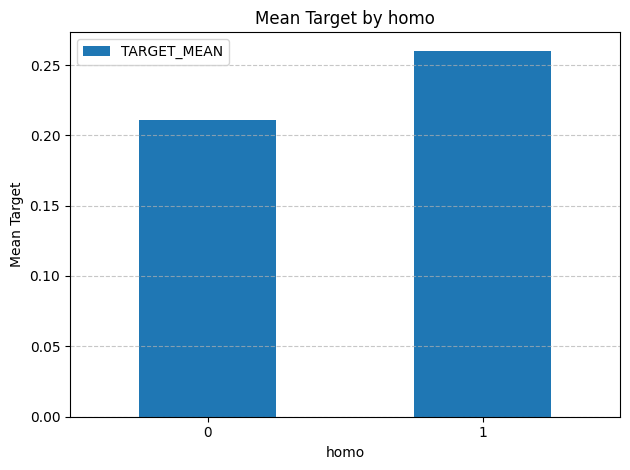

      TARGET_MEAN
homo             
0        0.211034
1        0.260255
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

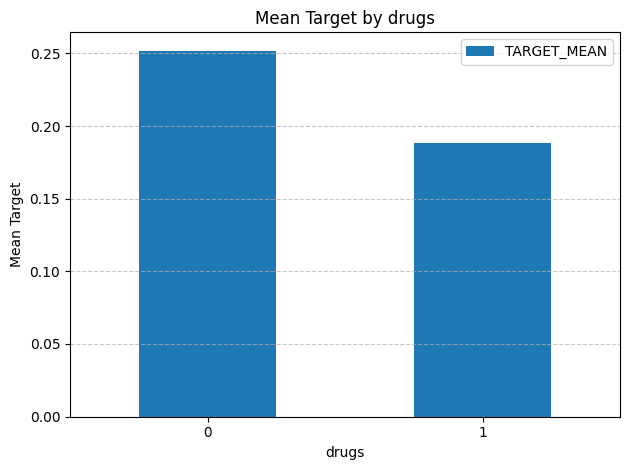

       TARGET_MEAN
drugs             
0         0.251884
1         0.188612
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

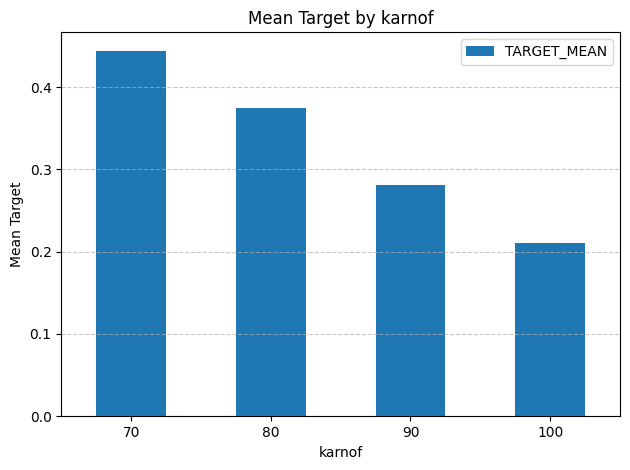

        TARGET_MEAN
karnof             
70         0.444444
80         0.375000
90         0.280813
100        0.210610
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

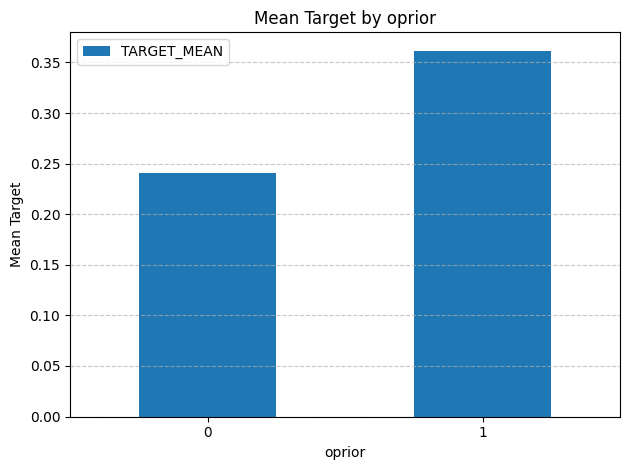

        TARGET_MEAN
oprior             
0          0.240918
1          0.361702
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

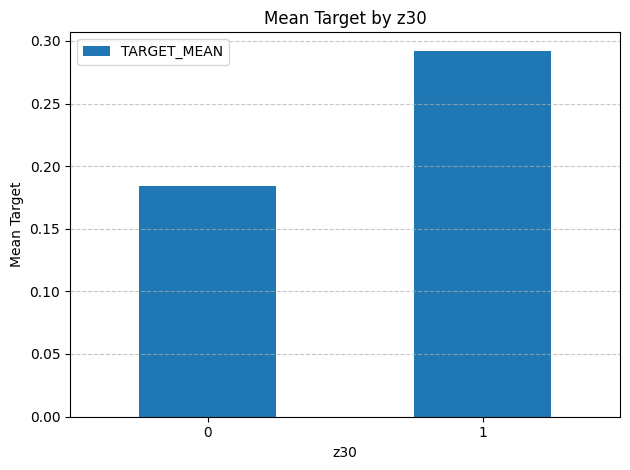

     TARGET_MEAN
z30             
0       0.183992
1       0.292268
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

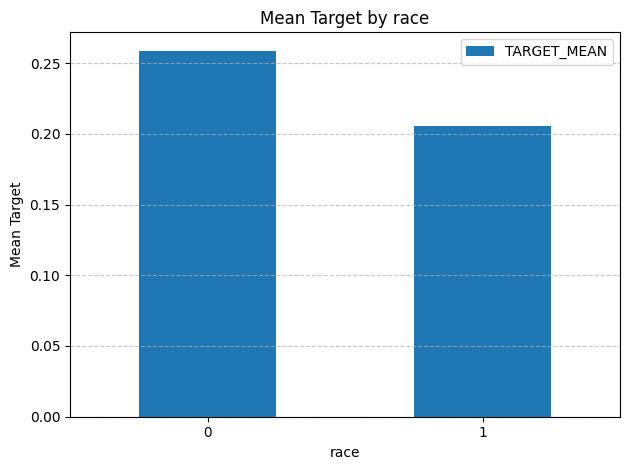

      TARGET_MEAN
race             
0        0.258870
1        0.205835
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

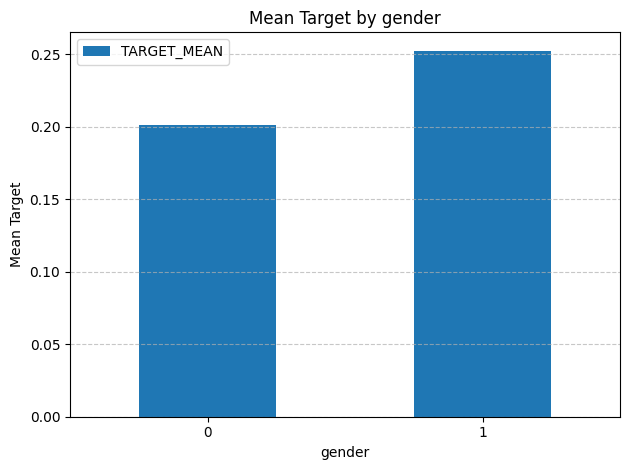

        TARGET_MEAN
gender             
0          0.201087
1          0.252400
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

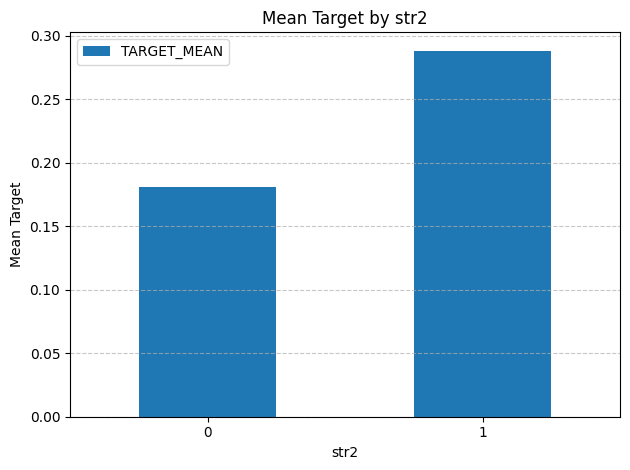

      TARGET_MEAN
str2             
0        0.180587
1        0.288109
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

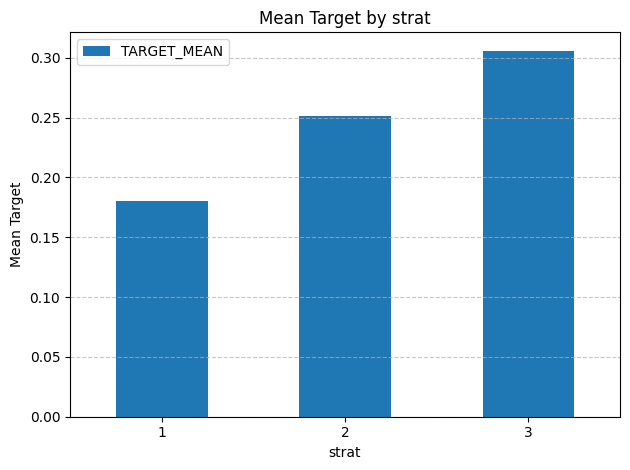

       TARGET_MEAN
strat             
1         0.180587
2         0.251220
3         0.306050
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

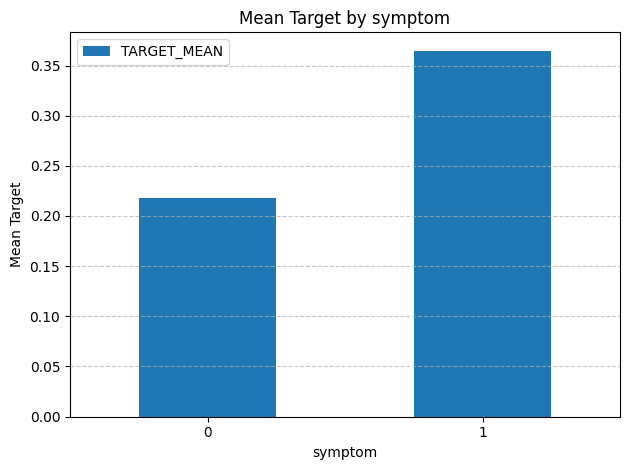

         TARGET_MEAN
symptom             
0           0.218202
1           0.364865
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

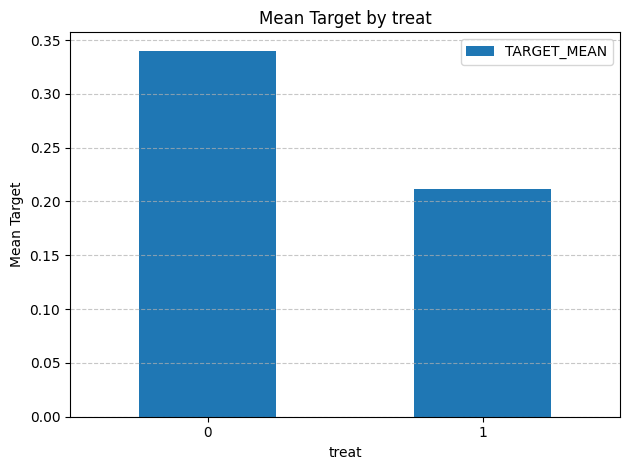

       TARGET_MEAN
treat             
0         0.340226
1         0.211574
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

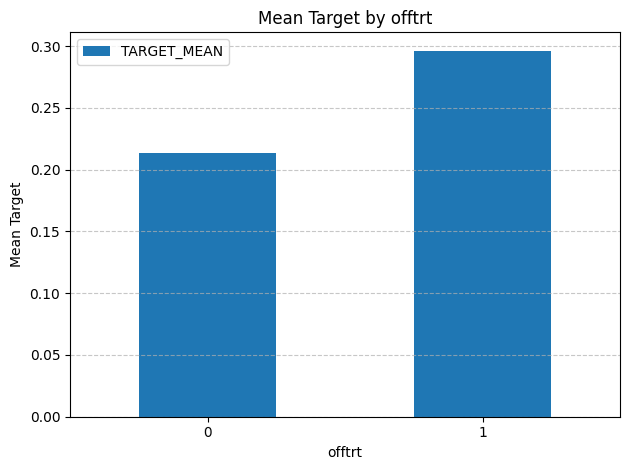

        TARGET_MEAN
offtrt             
0          0.213500
1          0.296392
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

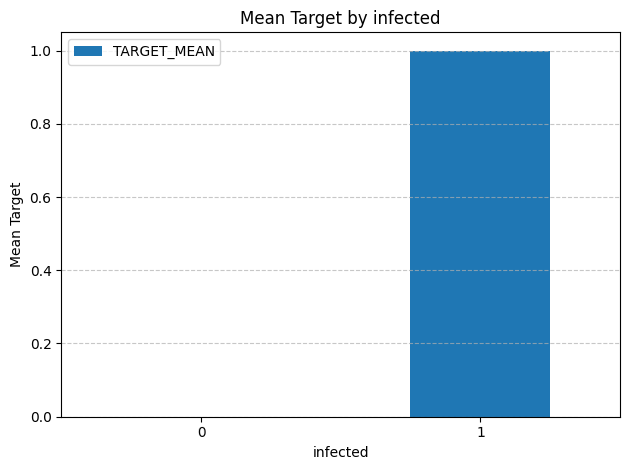

          TARGET_MEAN
infected             
0                 0.0
1                 1.0
--------------------------------------------------


In [ ]:
for col in cat_cols:
    target_summary_with_cat_visualized(data, 'infected', col) # Ganti 'dataset_clean' dengan 'data' jika Anda ingin menggunakan dataframe original

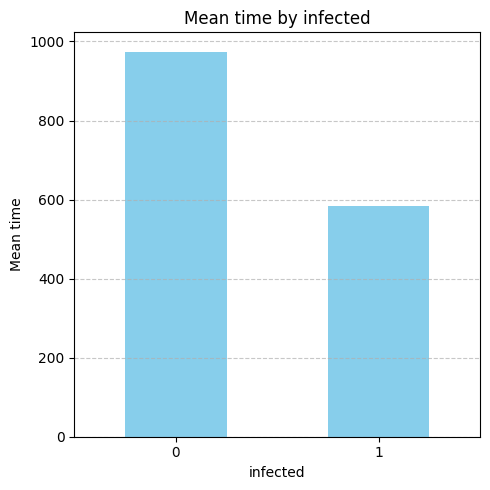

                time
infected            
0         974.438813
1         583.011516
--------------------------------------------------


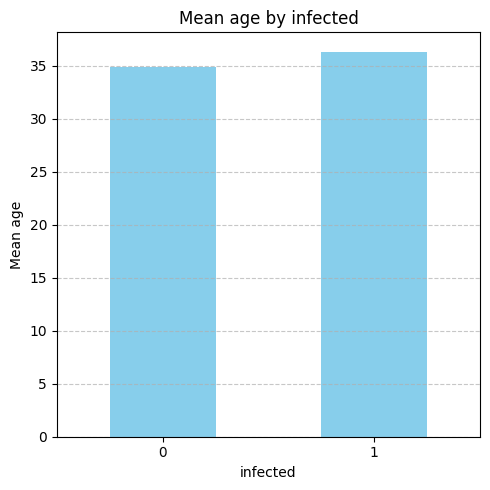

                age
infected           
0         34.900494
1         36.328215
--------------------------------------------------


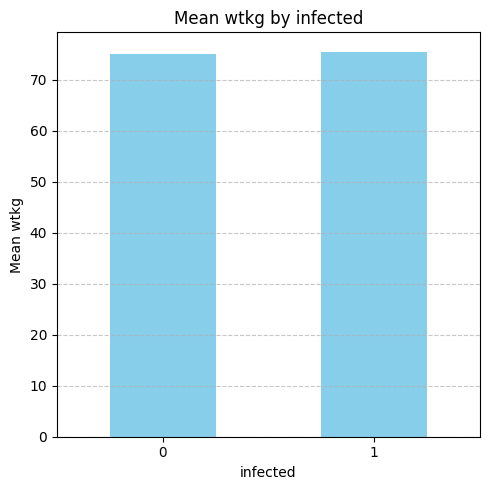

               wtkg
infected           
0         75.003379
1         75.503977
--------------------------------------------------


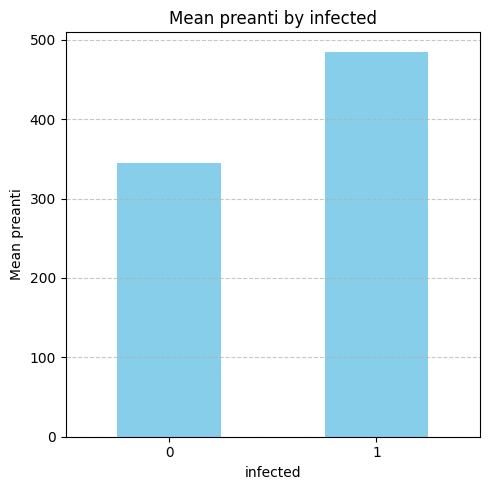

             preanti
infected            
0         345.022868
1         485.239923
--------------------------------------------------


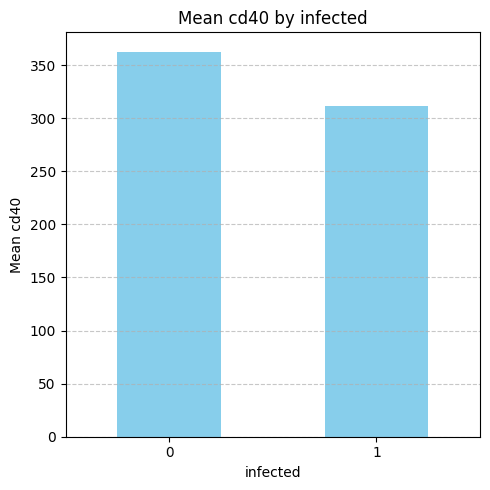

                cd40
infected            
0         362.989493
1         311.717850
--------------------------------------------------


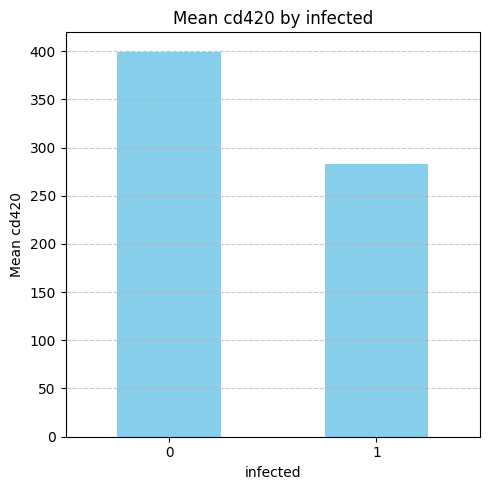

               cd420
infected            
0         399.690358
1         283.161228
--------------------------------------------------


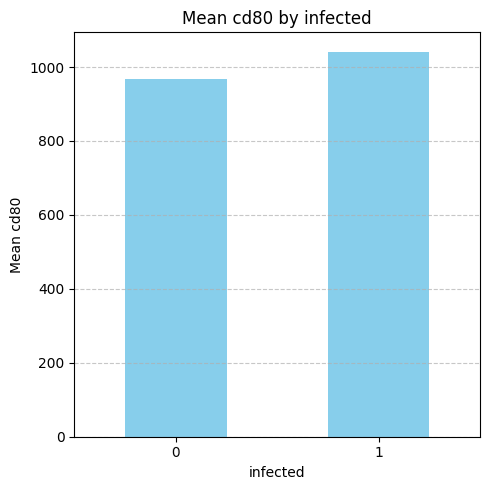

                 cd80
infected             
0          968.827565
1         1041.905950
--------------------------------------------------


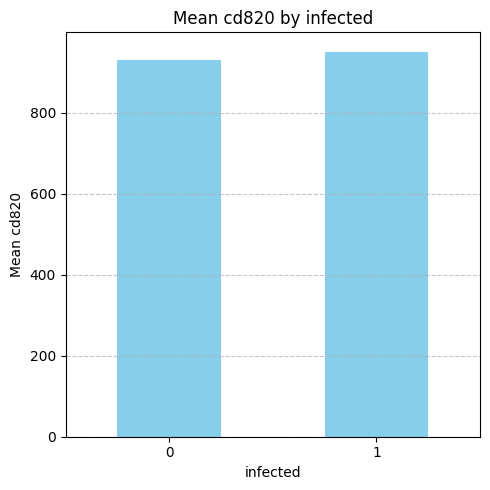

               cd820
infected            
0         930.448702
1         950.652591
--------------------------------------------------


In [ ]:
for col in num_cols:
    target_summary_with_num_visualized(data, 'infected', col)  # Ganti 'dataset_clean' dengan 'data' jika Anda ingin menggunakan dataframe original

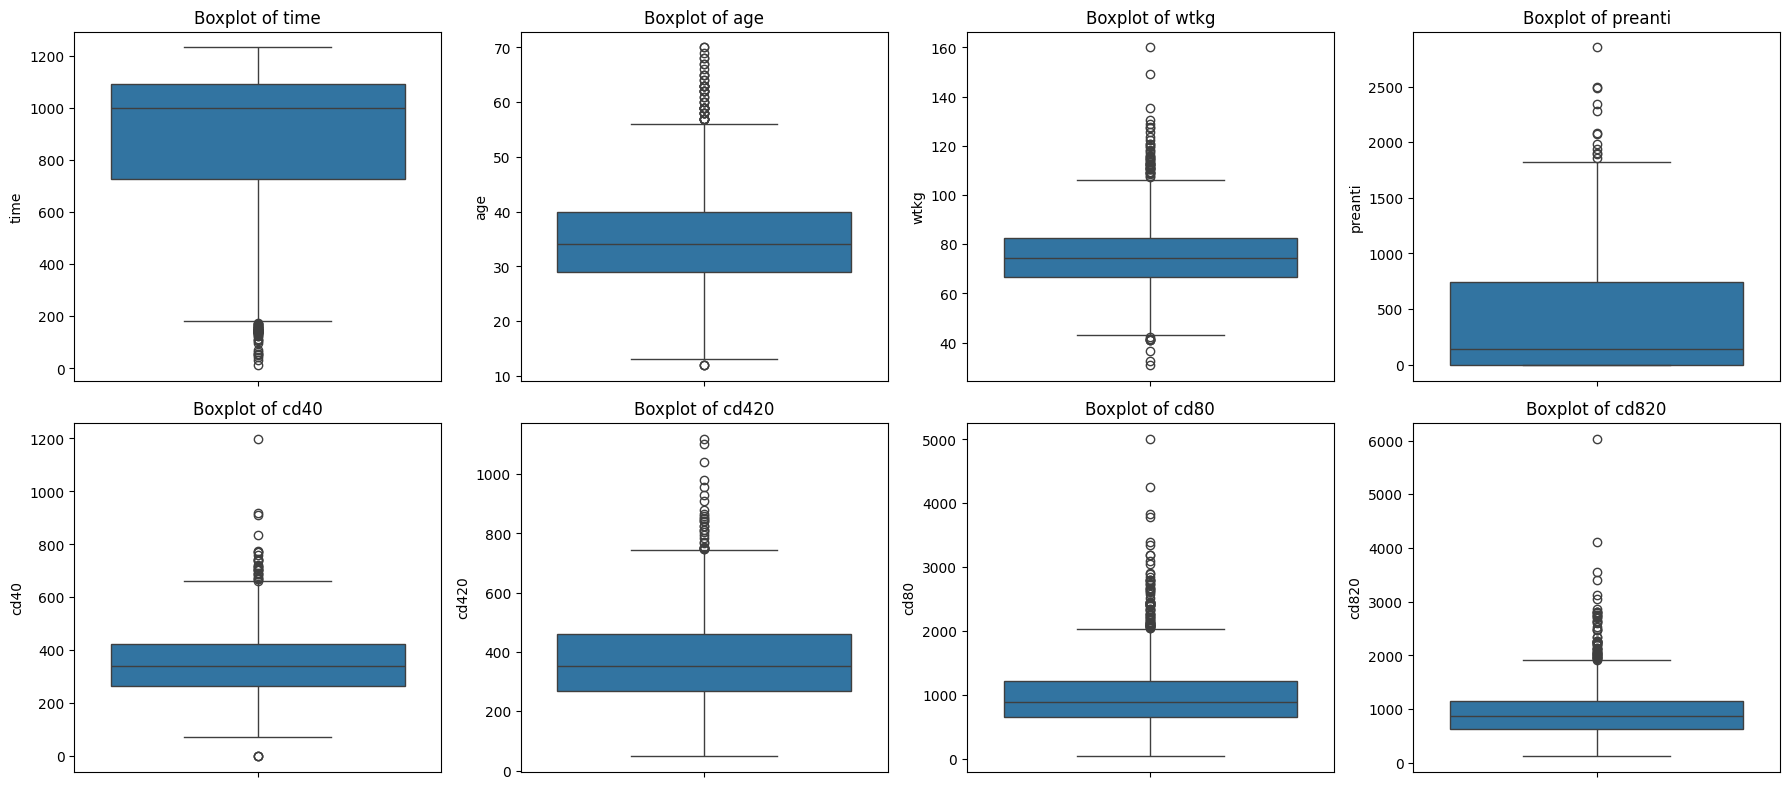

In [ ]:
boxplot(data, num_cols)  # Ganti 'dataset_clean' dengan 'data' jika Anda ingin menggunakan dataframe original

In [ ]:
# Lakukan cleaning data disini
data_clean = data.dropna()

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    dataframe_filtered = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe_filtered

# Menghapus outlier dari semua kolom numerik
for column in num_cols:
    data_clean = remove_outliers_iqr(data_clean, column)

# Verifikasi jumlah data setelah penghapusan outlier
print(f"Jumlah data sebelum penghapusan outlier: {len(data)}")
print(f"Jumlah data setelah penghapusan outlier: {len(data_clean)}")

Jumlah data sebelum penghapusan outlier: 2139
Jumlah data setelah penghapusan outlier: 1824


# **Mengkonstruksi Data**

In [ ]:
# Memberikan informasi detail tentang struktur dataframe
data_clean.info() # data_clean sebagai dataset yang telah bersih

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 0 to 2136
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      1824 non-null   int64  
 1   trt       1824 non-null   int64  
 2   age       1824 non-null   int64  
 3   wtkg      1824 non-null   float64
 4   hemo      1824 non-null   int64  
 5   homo      1824 non-null   int64  
 6   drugs     1824 non-null   int64  
 7   karnof    1824 non-null   int64  
 8   oprior    1824 non-null   int64  
 9   z30       1824 non-null   int64  
 10  preanti   1824 non-null   int64  
 11  race      1824 non-null   int64  
 12  gender    1824 non-null   int64  
 13  str2      1824 non-null   int64  
 14  strat     1824 non-null   int64  
 15  symptom   1824 non-null   int64  
 16  treat     1824 non-null   int64  
 17  offtrt    1824 non-null   int64  
 18  cd40      1824 non-null   int64  
 19  cd420     1824 non-null   int64  
 20  cd80      1824 non-null   int64  
 

In [ ]:
# Memberikan ringkasan statistik deskriptif dari kolom numerik
data_clean.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,897.764254,1.539474,34.561404,74.221715,0.083333,0.663925,0.128289,95.614035,0.022478,0.547697,369.506031,0.291118,0.825658,0.586075,1.979167,0.173794,0.756579,0.351425,344.900219,366.140351,913.095395,866.261513,0.231360
std,270.283154,1.125469,7.730837,11.468554,0.276461,0.472494,0.334504,5.780416,0.148273,0.497856,446.804136,0.454403,0.379507,0.492671,0.898346,0.379036,0.429265,0.477546,107.478449,129.365132,358.405074,323.547647,0.421817
min,182.000000,0.000000,13.000000,43.001280,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.000000,74.000000,105.000000,131.000000,0.000000
25%,768.250000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,262.750000,270.000000,640.000000,620.000000,0.000000
50%,1002.000000,2.000000,34.000000,73.800000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,153.500000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,339.000000,352.000000,868.000000,829.000000,0.000000
75%,1091.000000,3.000000,40.000000,81.648000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,724.750000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,420.000000,455.250000,1134.250000,1083.000000,0.000000
max,1231.000000,3.000000,56.000000,105.900000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1856.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,663.000000,729.000000,1984.000000,1809.000000,1.000000


In [ ]:
# Menampilkan 5 baris pertama
data_clean.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1181,0,1,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,930,0,1,1,3,0,0,0,244,225,708,699,1


## **Menentukan Label**

In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data_clean.drop("infected", axis = 1)
y = data_clean["infected"]

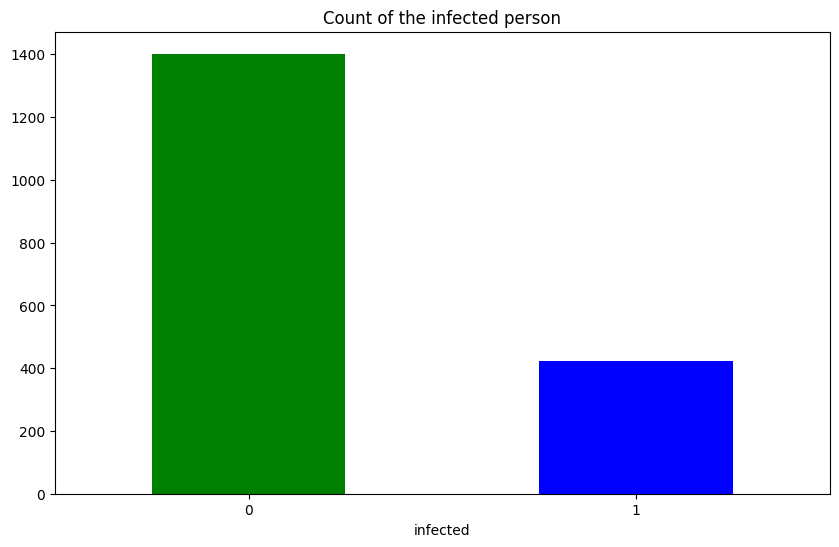

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data_clean['infected'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE # Library untuk membantu oversampling dengan teknik SMOTE

In [ ]:
smote = SMOTE(random_state=42) # Inisialisasi SMOTE
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y) # Mengaplikasikan oversampling pada dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


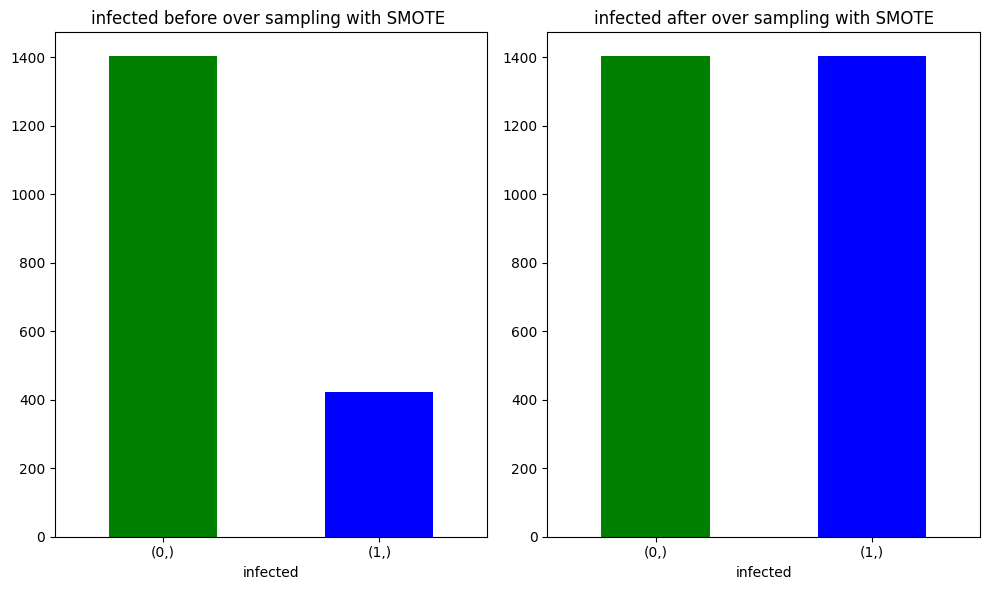

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

In [ ]:
from sklearn.model_selection import train_test_split # Library untuk membantu memisahkan data menjadi dataset latih dan dataset validasi
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled) # 80% data latih, 20% data test

## **Membangun Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Buat dan latih model KNN
model = KNeighborsClassifier()  # Inisialisasi KNeighborsClassifier
model.fit(X_train, y_train)  # Latih model

# Melakukan prediksi dan evaluasi
y_pred = model.predict(X_test)  # Make predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy}")  # Print accuracy

Accuracy: 0.8983957219251337


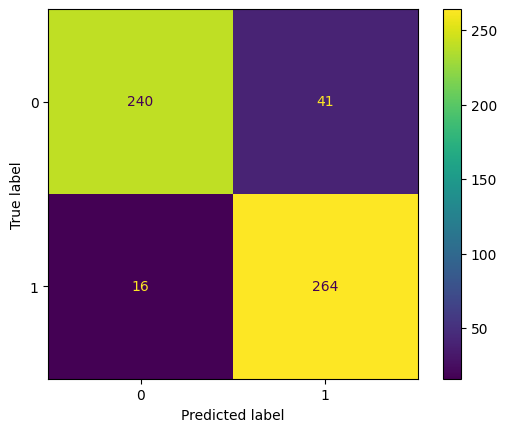

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       281
           1       0.87      0.94      0.90       280

    accuracy                           0.90       561
   macro avg       0.90      0.90      0.90       561
weighted avg       0.90      0.90      0.90       561



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy with Best Model: 0.910873440285205


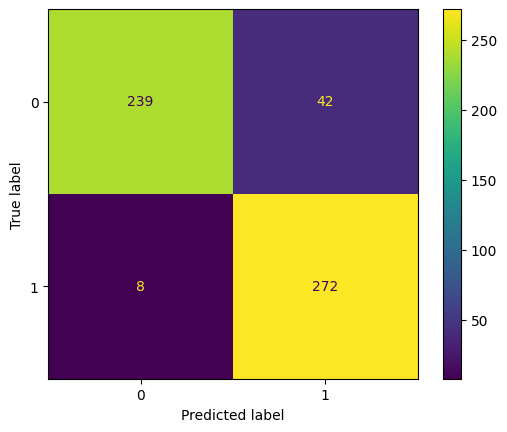

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       281
           1       0.87      0.97      0.92       280

    accuracy                           0.91       561
   macro avg       0.92      0.91      0.91       561
weighted avg       0.92      0.91      0.91       561



In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),  # Use KNeighborsClassifier
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = KNeighborsClassifier(**best_params)  # Use KNeighborsClassifier

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
